In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/paperspace/fastai/old')
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "../data/our_cats"
sz = 224

In [7]:
assert(torch.cuda.is_available())
assert(torch.backends.cudnn.enabled)

AssertionError: 

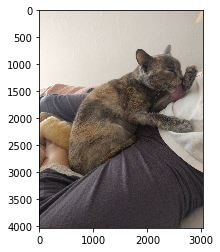

In [8]:
files = os.listdir(f"{PATH}/valid/catherine")
img = plt.imread(f'{PATH}/valid/catherine/{files[random.randint(0, 4)]}')
plt.imshow(img)

In [9]:
img.shape

(4032, 3024, 3)

In [10]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [11]:
arch=resnet34
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [12]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   accuracy        
    0      0.984641   0.948146   0.454545  



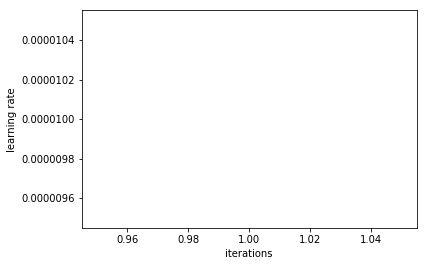

In [13]:
learn.sched.plot_lr()

In [14]:

learn.fit(0.01, 15)

epoch      trn_loss   val_loss   accuracy        
    0      0.966924   1.015479   0.454545  
    1      0.876539   0.993843   0.454545        
    2      0.753435   0.970129   0.454545        
    3      0.642182   0.941676   0.454545        
    4      0.56269    0.898124   0.454545        
    5      0.492794   0.844528   0.454545        
    6      0.435328   0.770922   0.454545        
    7      0.38331    0.695007   0.545455        
    8      0.347159   0.610363   0.545455        
    9      0.311915   0.533668   0.545455        
    10     0.283773   0.460932   0.727273        
    11     0.258828   0.399525   0.727273        
    12     0.242868   0.33824    0.818182        
    13     0.224311   0.293699   0.818182        
    14     0.20737    0.255436   0.818182        



[array([0.25544]), 0.8181818181818182]

In [89]:
data.classes

['catherine', 'tiberius']

In [90]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
log_preds

array([[-0.00406, -5.50757],
       [-0.9296 , -0.50205],
       [-0.03362, -3.40952],
       [-0.30814, -1.32732],
       [-0.27216, -1.43436],
       [-0.08765, -2.47792],
       [-5.53528, -0.00395],
       [-4.66899, -0.00943],
       [-6.70475, -0.00123],
       [-1.6562 , -0.21179],
       [-6.64949, -0.0013 ]], dtype=float32)

In [91]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(tiberius)
probs

array([0.00406, 0.60529, 0.03306, 0.26519, 0.23827, 0.08392, 0.99605, 0.99062, 0.99878, 0.80914, 0.99871],
      dtype=float32)

In [107]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 2), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(f'{PATH}/{ds.fnames[idx]}'))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')


In [108]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most Catherine Catherine


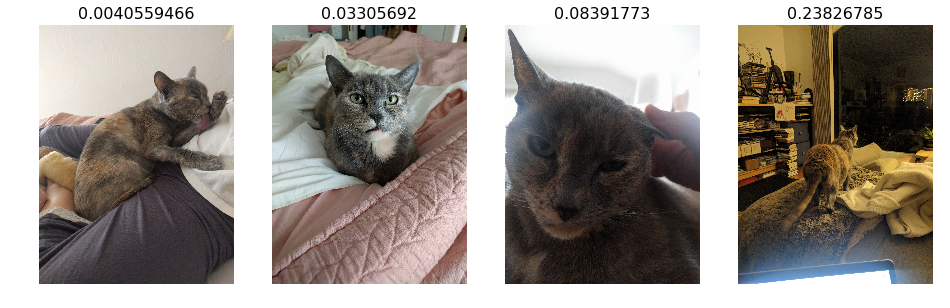

In [115]:
plot_val_with_title(most_by_correct(0, True), "Most Catherine Catherine")

Most Tiberius Tiberius


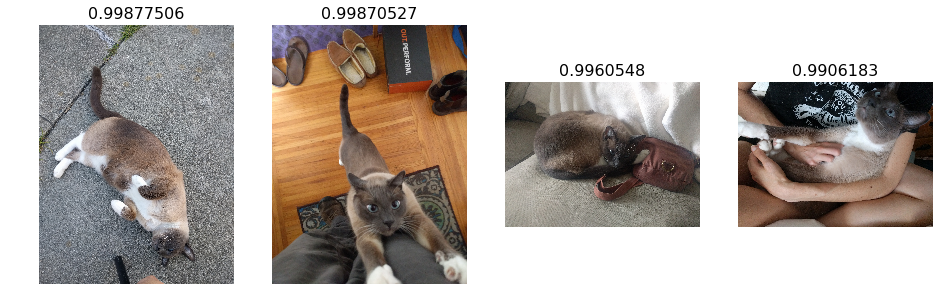

In [114]:
plot_val_with_title(most_by_correct(1, True), "Most Tiberius Tiberius")